# Meeting 17/07/2023

## Topics:

 - Results - Acrobot Model working, Target Network Update Frequency impact on Loss and Gradients, Entanglement During Training
 - Thesis - Organization
 - Poster

## 1) Results

### 1.1) Acrobot Model Working

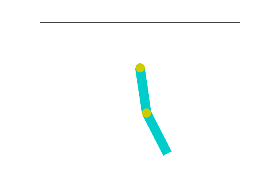

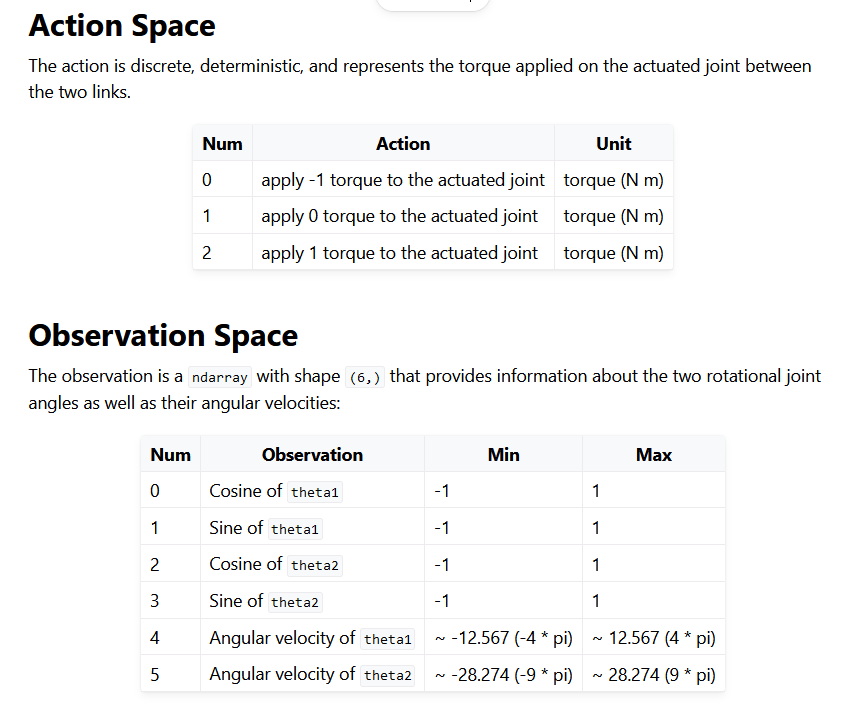

We wanted the models to work on Acrobot to verify whether the results we were getting were true only for the CartPole-v0 environment. However, finding good hyperparameters was very hard but I finally managed to find some that worked and achieved very good performance on Acrobot.

Remembering the different architectures:

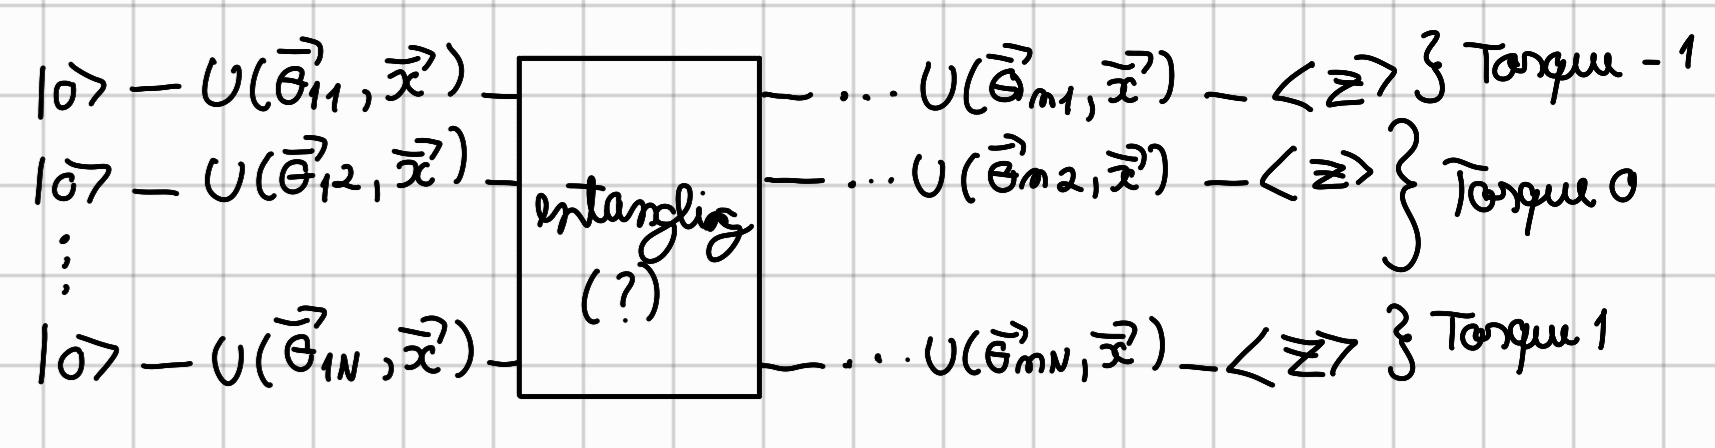

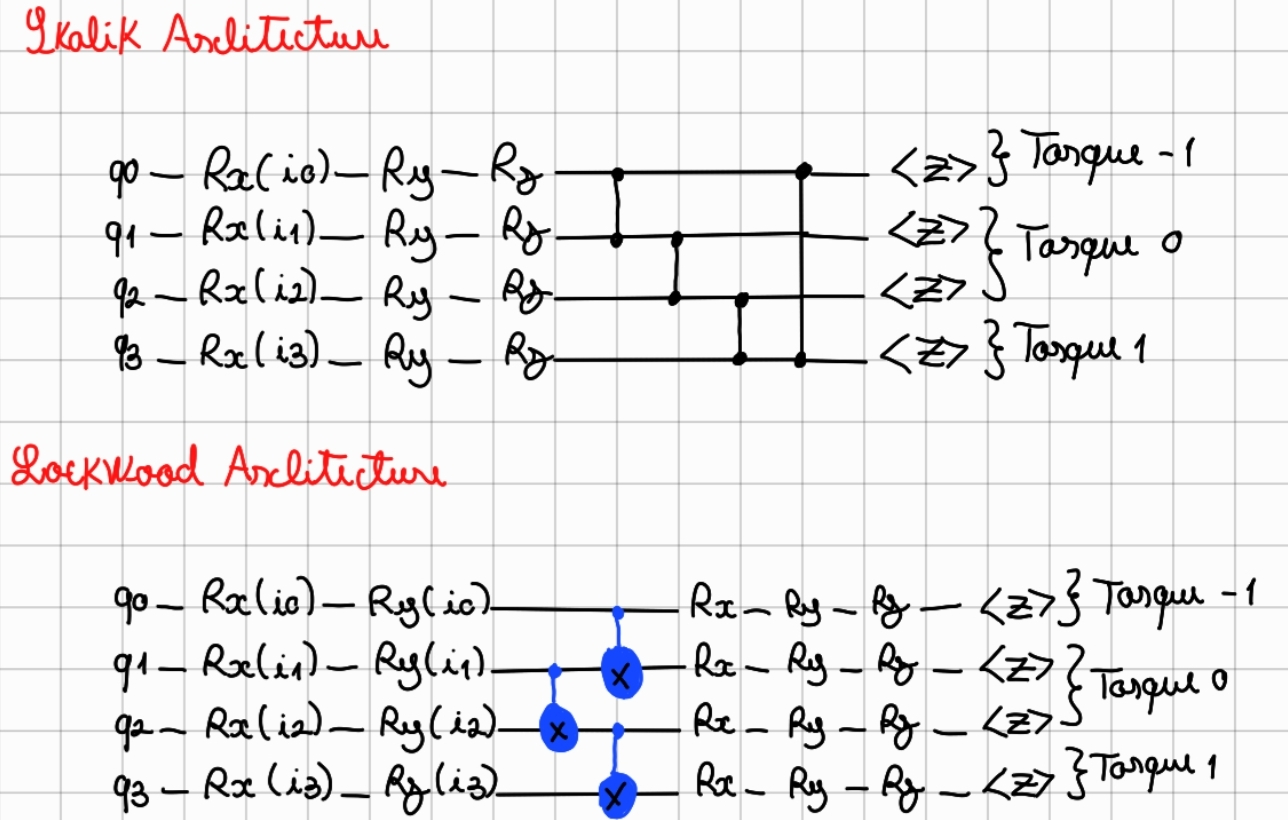

**Important Details:**

I tried three different input encoding methods in terms of the classical pre-processing of the state-space that was done:

- ScaledEncoding: Every feature is scaled to be between 0 and 2pi
- AcrobotEncoding: Every feature is normalized to be between -1 and 1
- AcrobotEncodingV2: First, I reduce the state-space size dimensionality from 6 to 4 by calculating theta1 and theta2 and using those values instead of the cossines and sines of each of them. Then, i normalized the angular velocities to be between 0 and 2pi.

This was all tried on the 4-qubit UQC architecture!

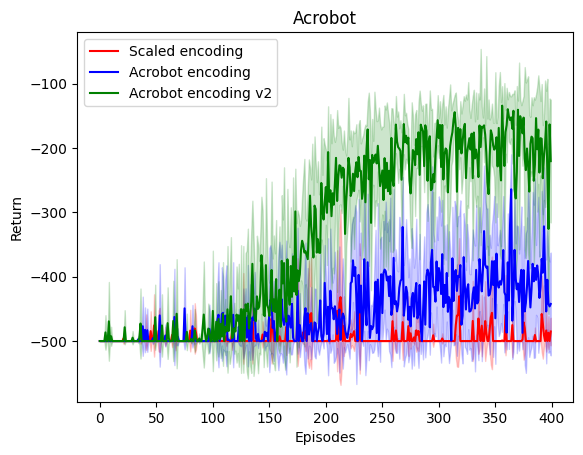

As we can see, reducing the dimensionality of the state-space increases the performance of the agents considerably.

After some more fine-tuning of hyperparameters, I also tested for the Skolik Architecture and the Lockwood Architecture. The results are shown below:

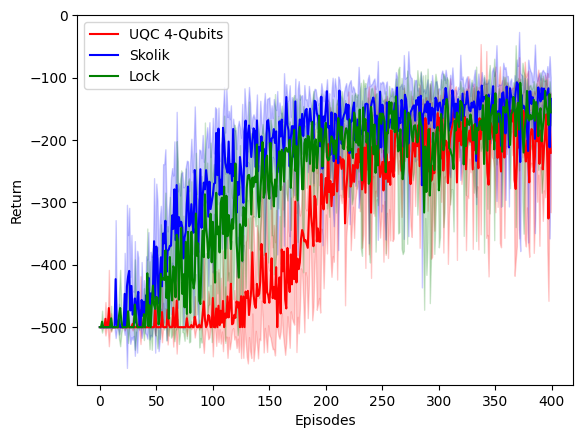

It seems that the Skolik and Lockwood Models perform assymptotically better than the UQC Model, as they learn much faster. Nonetheless, this is the first time we see Quantum Variational Q-Learning models working on Acrobot-v1, which is a much harder environment than CartPole-v0.

Now let's see if the gradients behave similarly to how they do in CartPole-v0:

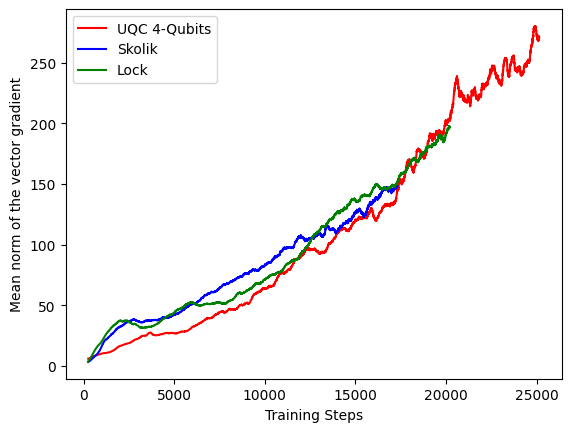

And we can confirm they do. Just like what happens in CartPole-V0, the mean norm of the gradient vector increases constantly during training as the agents learn.

## 1.2) Target Network Update Frequency Impact on Loss and Gradients

It seems like, in Q-Learning, it's possible for an agent to learn while the loss function is increasing, and my suspicion is that this is due to the fact that we have moving targets. To test this, I tested the same model on CartPole-v0 with different target network update frequencies. The results of the performance of the agents are shown below:

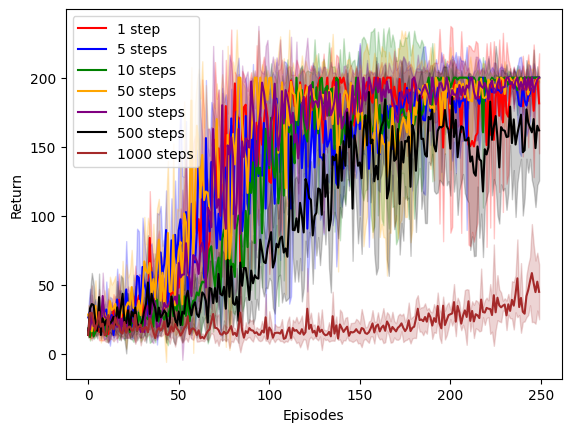

It seems like between 1 and 100 steps between target network updates, there isnt much difference in performance. However, as the update frequency gets smaller and smaller, the performance gets much worse (as we can see from the agents with 500 and 1000 steps).

Now let's look at the loss function:

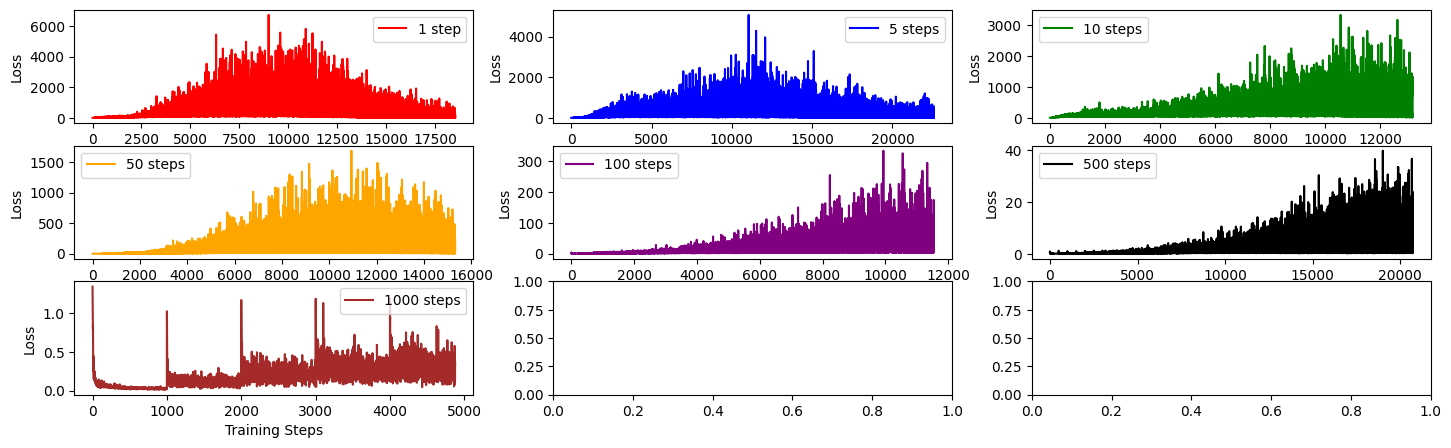

As we can see and as I guessed, the loss function starts to behave very differently as the target network update frequency decreases. First, the magnitude of the loss function decreases massively and second, we can start to see the effects of the moving targets, as the loss function starts to increase again after a certain point.

And looking at the gradients:

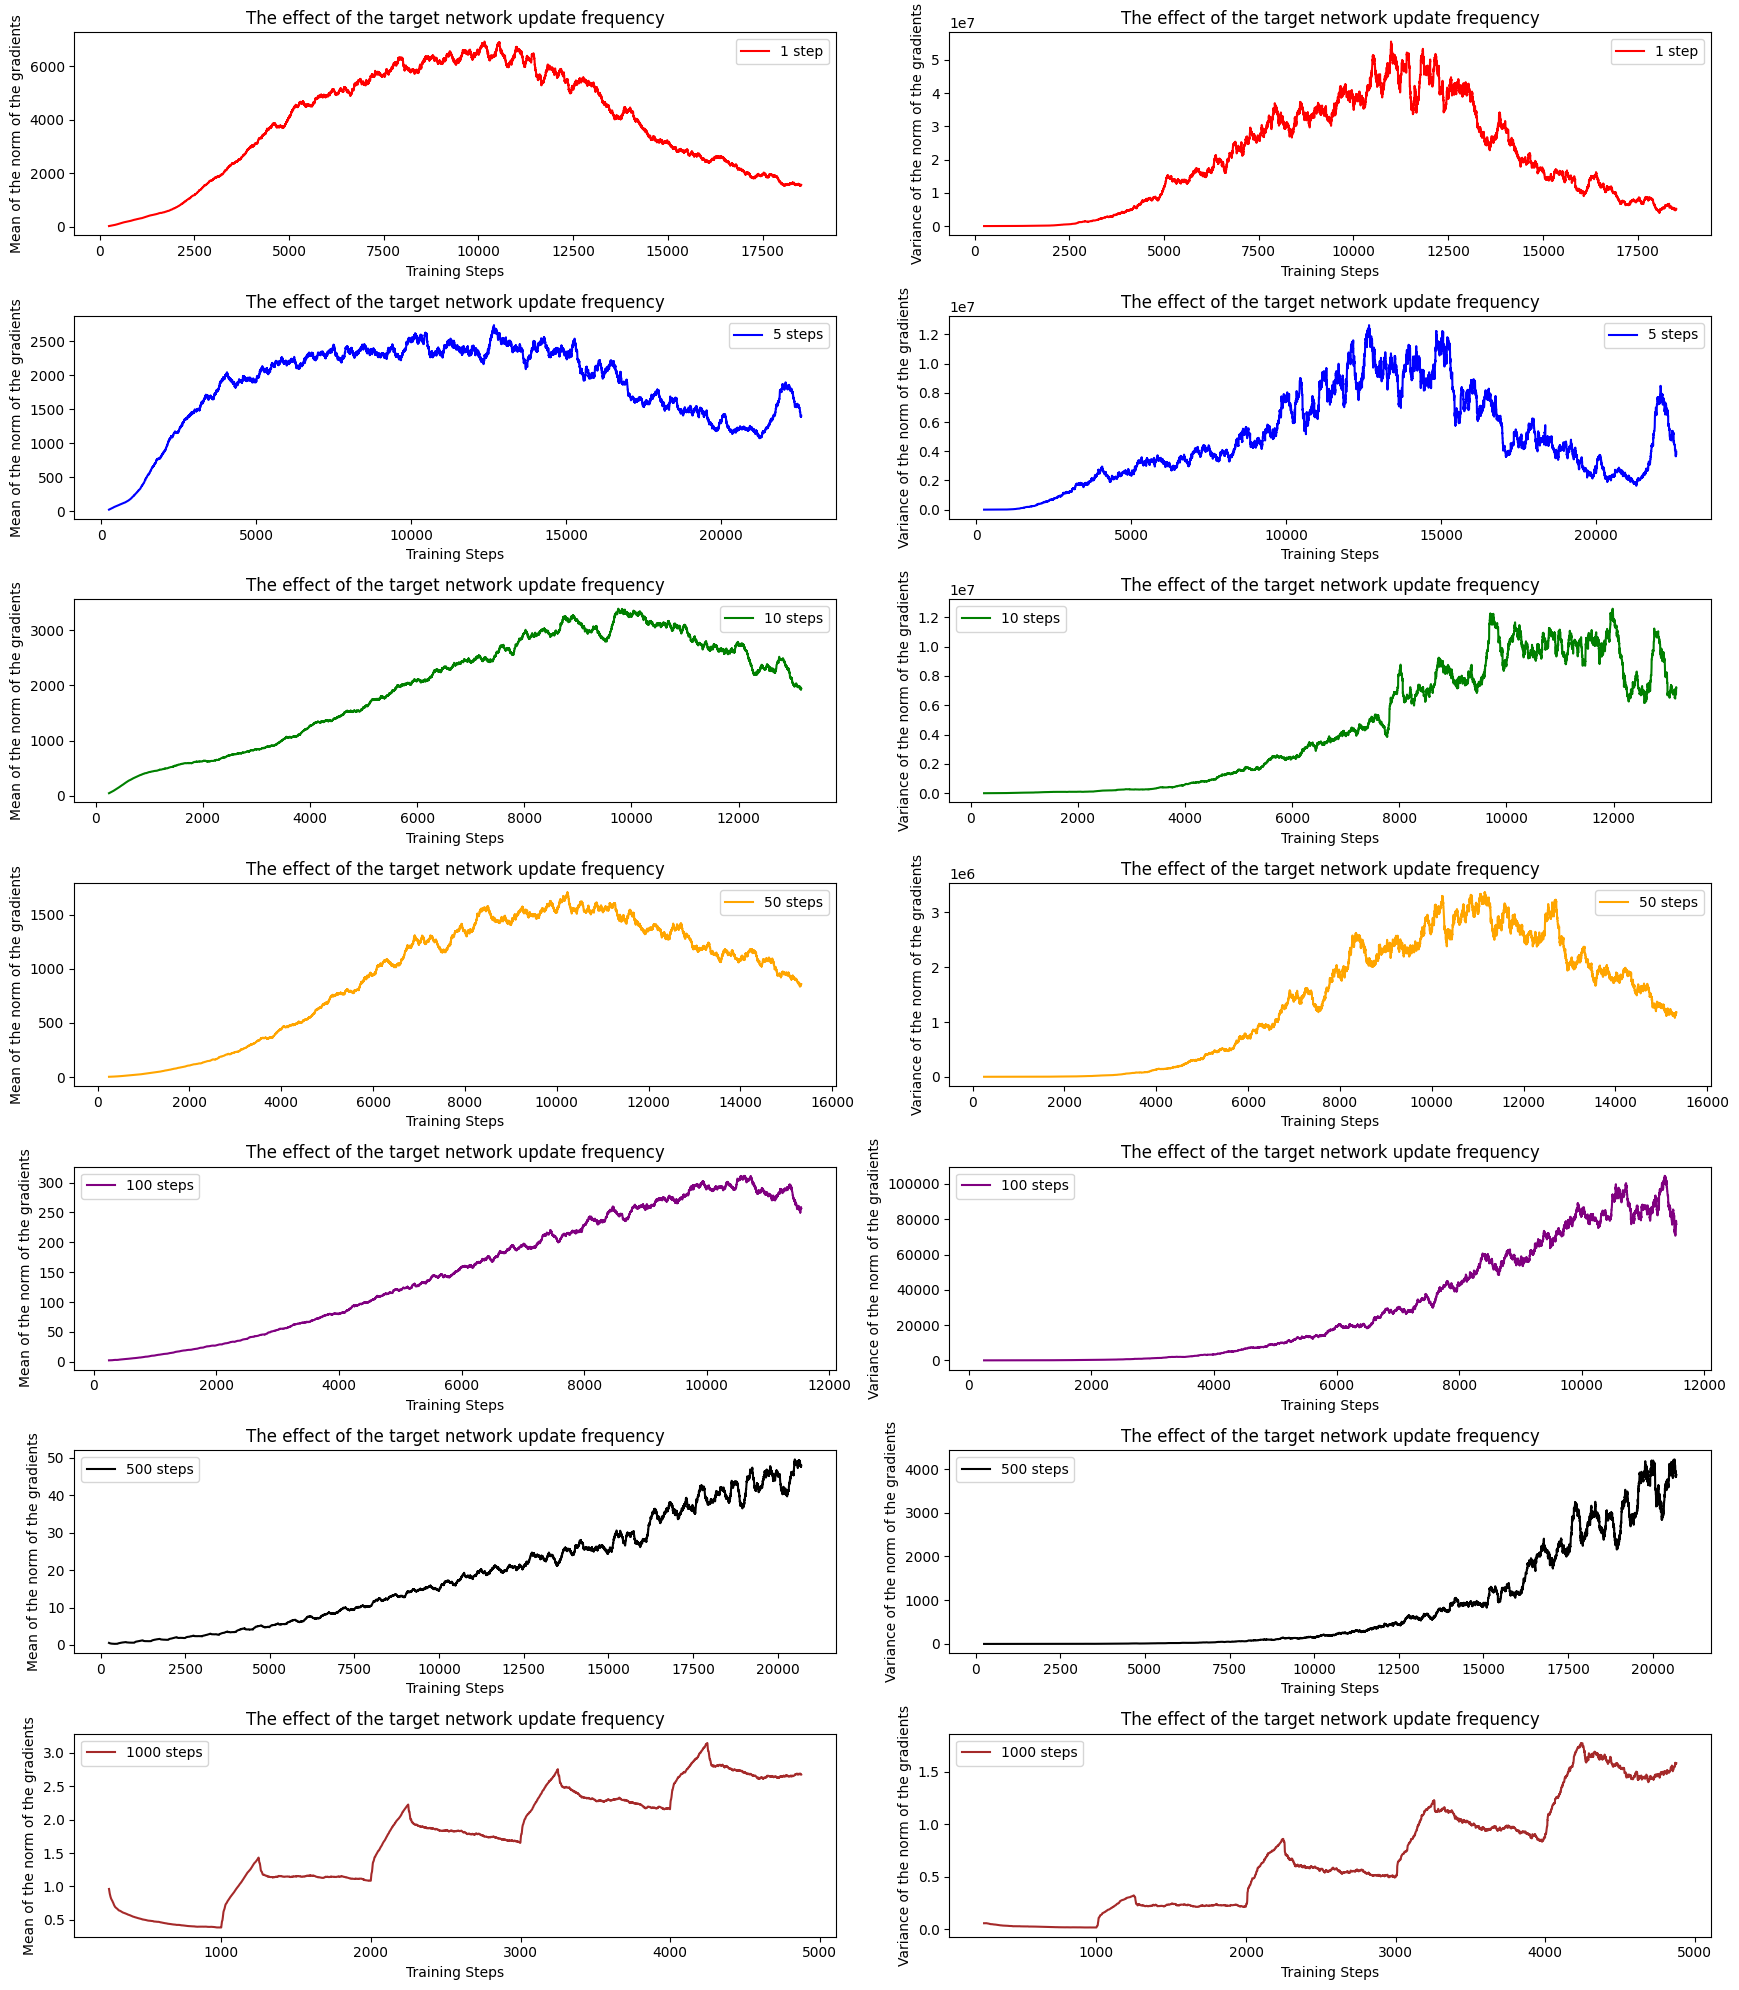

As I guessed, something similar happens with the gradients.

**Important takeaways from this:**

- The target network update frequency is a very important hyperparameter that needs to be tuned carefully.
- It seems like there is a golden range where we can have a good performance and the gradients to keep increasing.In other words, we can take advantage of this instability that is particular to Q-Learning by mitigating the effect of Barren Plateaus.

### 1.3) UQC without entanglement and entanglement training

Remember we have two different types of multi-qubit UQCs:
- 1) **Full Encoding UQC** - Every feature is encoded into every single qubit
- 2) **Partial Encoding UQC** - Each subset of features is encoded into a different qubit

I have been using entanglement layers composed of CZ gates to entangle the qubits. However, for the full encoding UQC, I experimented not using entanglement at all and the results were very interesting:

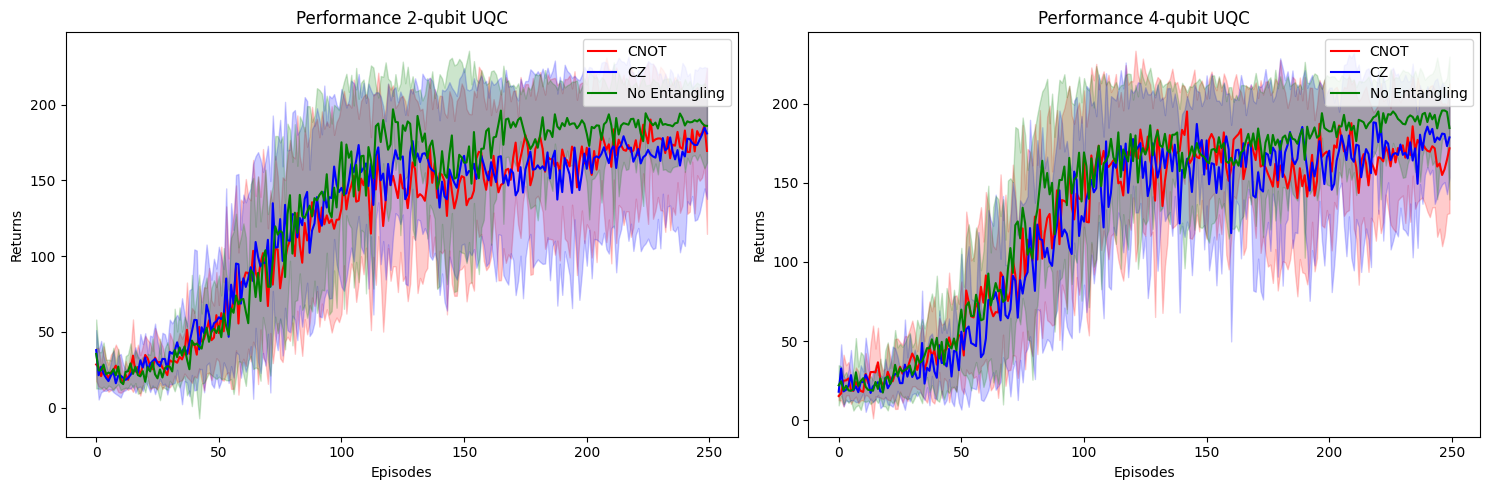

**The models without entanglement also manage to solve the environment!!**

This is expected, in a way, because each qubit is a Universal Quantum Classifier, which means each one of them is capable of approximating any continuous and bounded function. Since we are feeding every single feature into every single qubit, each qubit is capable of learning the entire function and, consequently, enntanglement seems to be  However, the fact that the models without entanglement manage to solve the environment is still very interesting, as it means that the entanglement layers are not necessary for the models to learn.

Now, let's repeat the experiment but for the partial encoding models and see what happens:

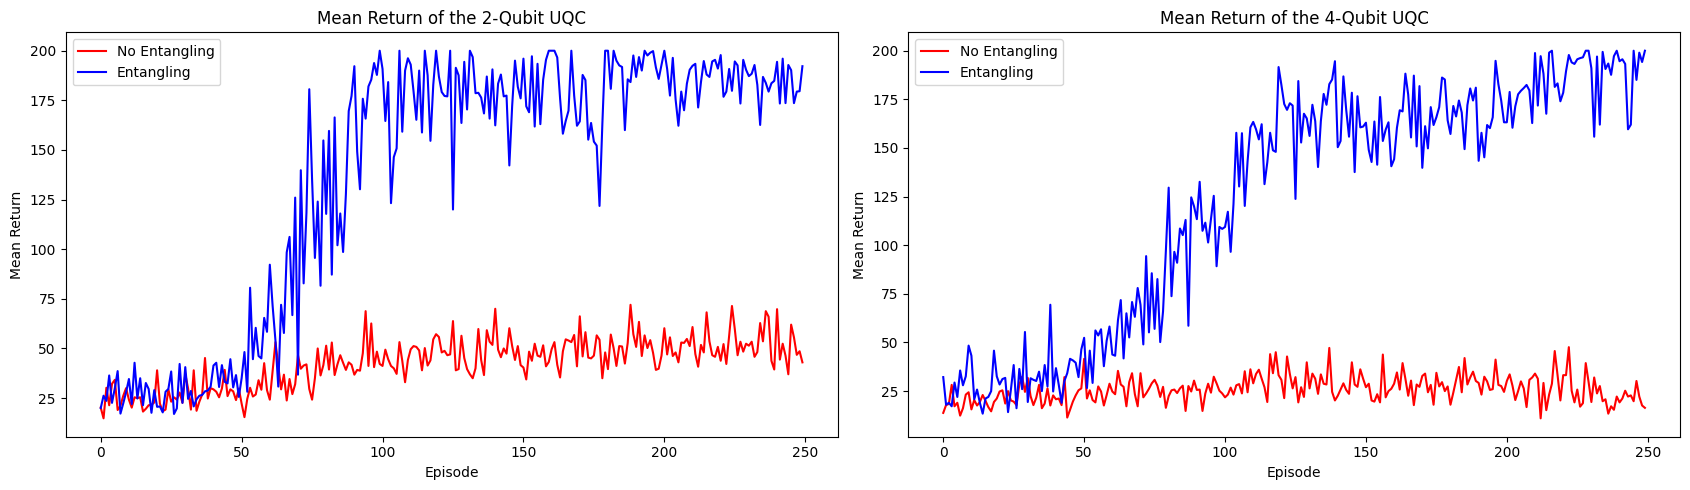

Here, the entanglement makes a HUGE difference because each qubit only has access to a subset of the features, which means that the entanglement layers are necessary for the qubits to have access to the full information necessary to approximate the function.

Measure the entanglement capability of a PQC:

$$Q(\ket{\psi}) = \frac{2}{|S|}\sum_{\theta_i\in S}\left(1 - \frac{1}{n}\sum_{j=1}^{n}Tr(\rho_j^2(\theta_i))\right)$$

- If the result is 1, then the state is maximally entangled
- If the result is 0, then the state is not entangled at all

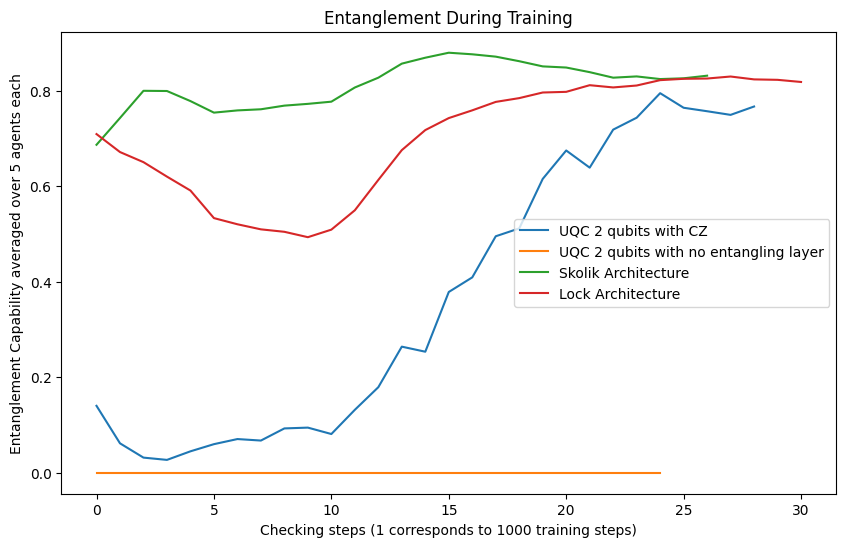

This is interesting because we see that, even if entanglement isn't very important for the Full Encoding multi-qubit UQC to solve the environment, during training the entanglement still increases constantly and the states produced by the PQC with the final weights are highly entangled.

Other topics:

**Thesis**

**Poster**